# Svetovno prebivalstvo

Projekt pri Programiranju 1 z namenom analize rasti prebivalstva glede na rast GDP.

## Priprava

Začnemo z nalaganjem paketa pandas in razpredelnic, ki jih ustvarimo z ustvari_cvs.py. Podatki so v .txt obliki pridobljeni s strani https://www.cia.gov/library/publications/resources/the-world-factbook/.

In [1]:
import pandas as pd

pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

GDP = pd.read_csv('csv-datoteke/GDP_na_prebivalca.csv', index_col='drzava')
GDP_rast = pd.read_csv('csv-datoteke/GDP_rast.csv', index_col='drzava')
populacija_rast = pd.read_csv('csv-datoteke/rast_populacije.csv', index_col='drzava')

In [48]:
%matplotlib inline

## Analiza 

Najprej bom izračunala povprečne vrednosti GDP, rasti GDP ter rasti prebivalstva.

In [2]:
povprecne = pd.concat([GDP.mean(1), GDP_rast.mean(1), populacija_rast.mean(1)], axis=1, join='inner')
povprecne = povprecne.rename(columns={1: 'Rast GDP', 2: 'Rast populacije', 0: 'GDP'})

povprecne = povprecne.sort_values(by='GDP')
povprecne

,GDP,Rast GDP,Rast populacije
drzava,,,
"Congo, Democratic Republic of the",450,6.6300,2.78750
Burundi,530,3.9500,3.30875
Somalia,600,2.5800,2.11250
Liberia,680,7.1300,2.74125
Central African Republic,810,1.3600,1.98000
Malawi,820,5.8100,2.80500
Niger,840,7.3000,3.38375
Eritrea,870,3.6700,2.44125
Zimbabwe,930,-0.2700,2.91375


In [3]:
povprecne.corr()

,GDP,Rast GDP,Rast populacije
GDP,1.000000,-0.139324,-0.257231
Rast GDP,-0.139324,1.000000,0.206691
Rast populacije,-0.257231,0.206691,1.000000


Vidimo lahko, da je, če gledamo povprečne vrednosti, korelacija med rastjo populacije ter rastjo GDP majhna. Poglejmo, če bodo vrednosti različne, če izračunamo korelacijo med rastjo GDP in rastjo prebivalstva le za 10 držav z največjim in 10 držav z najmanjšim GDP.

In [10]:
najmanjsi = povprecne.head(10)
najmanjsi.corr()

,GDP,Rast GDP,Rast populacije
GDP,1.000000,-0.369443,-0.021202
Rast GDP,-0.369443,1.000000,0.438877
Rast populacije,-0.021202,0.438877,1.000000


In [11]:
najvecji = povprecne.tail(10)
najvecji.corr()

,GDP,Rast GDP,Rast populacije
GDP,1.000000,0.383846,0.399256
Rast GDP,0.383846,1.000000,0.592676
Rast populacije,0.399256,0.592676,1.000000


V teh primerih je korelacija že večja, vendar to najverjetneje vseeno ni najboljši pokazatelj dejanskega stanja, zato si izberimo nekaj držav in za vsako izmed njih podrobneje analiziranjmo odvisnost rasti prebivalstva od rasti GDP.

In [36]:
kongo = pd.concat([GDP.loc['Congo, Democratic Republic of the'], 
                   GDP_rast.loc['Congo, Democratic Republic of the'], 
                   populacija_rast.loc['Congo, Democratic Republic of the']
                  ], axis=1) 
kongo.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva']
kongo.corr()

,GDP,Rast GDP,Rast prebivalstva
GDP,1.000000,0.475617,-0.628132
Rast GDP,0.475617,1.000000,-0.606987
Rast prebivalstva,-0.628132,-0.606987,1.000000


In [35]:
niger = pd.concat([GDP.loc['Niger'], 
                   GDP_rast.loc['Niger'], 
                   populacija_rast.loc['Niger']
                  ], axis=1) 
niger.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva']
niger.corr()

,GDP,Rast GDP,Rast prebivalstva
GDP,1.000000,0.066954,-0.278831
Rast GDP,0.066954,1.000000,0.201563
Rast prebivalstva,-0.278831,0.201563,1.000000


In [40]:
slovenija = pd.concat([GDP.loc['Slovenia'], 
                   GDP_rast.loc['Slovenia'], 
                   populacija_rast.loc['Slovenia']
                  ], axis=1) 
slovenija.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva']
slovenija.corr()

,GDP,Rast GDP,Rast prebivalstva
GDP,1.000000,-0.339688,-0.040091
Rast GDP,-0.339688,1.000000,0.573139
Rast prebivalstva,-0.040091,0.573139,1.000000


In [41]:
ZDA = pd.concat([GDP.loc['United States'], 
                   GDP_rast.loc['United States'], 
                   populacija_rast.loc['United States']
                  ], axis=1) 
ZDA.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva']
ZDA.corr()

,GDP,Rast GDP,Rast prebivalstva
GDP,1.000000,-0.277833,-0.785759
Rast GDP,-0.277833,1.000000,-0.025126
Rast prebivalstva,-0.785759,-0.025126,1.000000


In [42]:
katar = pd.concat([GDP.loc['Qatar'], 
                   GDP_rast.loc['Qatar'], 
                   populacija_rast.loc['Qatar']
                  ], axis=1) 
katar.columns = ['GDP', 'Rast GDP', 'Rast prebivalstva']
katar.corr()

,GDP,Rast GDP,Rast prebivalstva
GDP,1.000000,0.478420,-0.454708
Rast GDP,0.478420,1.000000,-0.780742
Rast prebivalstva,-0.454708,-0.780742,1.000000


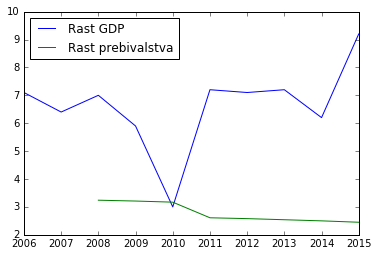

In [54]:
kongo[['Rast GDP', 'Rast prebivalstva']].plot()